# Main Aim Question 1

## Is there any evidence of a gender pay gap among the directors?

In [1]:
# Setup

# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
from IPython.display import HTML
import seaborn as sns
import scipy.stats as stats

# Set any preferences you want for the notebook
warnings.filterwarnings('ignore')

# Set the home directory to the main repository page
os.chdir('..')
os.listdir()

# Read in the dataset
df = pd.read_csv('data/data.csv')

# Create a column called 'company' which identifies where a company belongs to
df['company'] = 1
company_number = 1
for i in range(1, len(df['company'])):
    if df['Stock return'][i] == df['Stock return'][i-1]:
        df['company'][i] = company_number
    else:
        company_number = company_number + 1
        df['company'][i] = company_number

# Create a company level dataframe
df_cmp = df[['company', 'Log(sales)', 'Stock return', 'Volatility', 'Board size', 'Fraction of female', 'Fraction of independent']].drop_duplicates(ignore_index = True)

In [2]:
# Pivot table of compensation by gender

pd.pivot_table(df, index = 'Gender', values = 'Compensation', aggfunc = ['count', 'mean', 'median', 'std', 'var'])

,count,mean,median,std,var
,Compensation,Compensation,Compensation,Compensation,Compensation
Gender,,,,,
0,1063,532.619955,453.562017,318.329383,101333.596128
1,693,564.215789,507.476696,306.544269,93969.389140


In [3]:
# Difference of compensation means between genders

round((df.loc[df['Gender'] == 0]['Compensation'].mean() - df.loc[df['Gender'] == 1]['Compensation'].mean()) * 1000, 2)

-31595.83

In [4]:
# Correlation between gender and compensation

df[['Gender', 'Compensation']].corr()

,Gender,Compensation
Gender,1.000000,0.049193
Compensation,0.049193,1.000000


In [5]:
data_group1 = np.array(df.loc[df['Gender'] == 0]['Compensation'])
data_group2 = np.array(df.loc[df['Gender'] == 1]['Compensation'])

# Perform the two sample t-test with equal variances
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-2.0627234503599645, pvalue=0.03928583119827949)

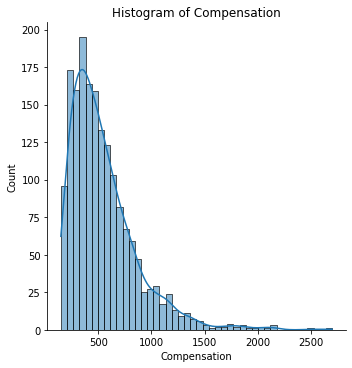

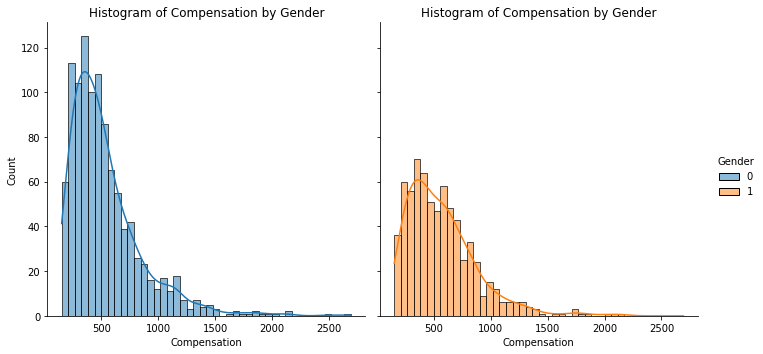

In [20]:
# Histograms of Compensation by Gender

sns.displot(df, x="Compensation", kde = True).set(title = "Histogram of Compensation")

sns.displot(df, x="Compensation", hue = "Gender", col = "Gender", kde = True).set(title = "Histogram of Compensation by Gender")

[Text(0.5, 1.0, 'Violinplot of Compensation by Gender')]

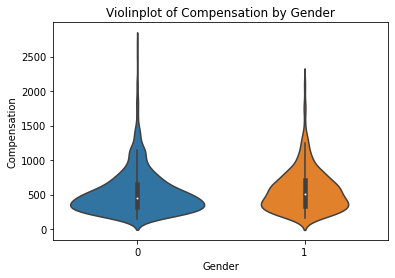

In [13]:
# Violin plots of Compensation by Gender

sns.violinplot(data=df, x="Gender", y="Compensation", fill = False, scale = "count", inner = "box").set(title = "Violinplot of Compensation by Gender")

#### Conclusion

There is evidence of a gender pay gap among the directors.

Firstly, the pivot table shows that male directors have an average compensation of `$532,619.96` whereas female directors have an average compensation of `$564,215.79`. Therefore on average female directors earn `$31,595.83` more than male directors.

Secondly, we can see the correlation between gender (where female is set to 1 and male is set to 0) is slightly positive at a value of `0.049` to 3 d.p.. This indicates a weak relationship between gender and compensation.

Finally, performing an independent samples t-test, we can validate that this is a significant difference where the significance level is set to alpha = 0.05. The t-statistic is `-2.063` to 3 d.p. and the p-value is `0.039` to 3 d.p..

Whilst we can show that there is a significant difference between the genders with respect to compensation, at this stage this relationship is only an association and we cannot validate that gender is a causal factor for compensation or vice-versa. For next steps, we'd like to measure this effect with other available co-factors to test if there are other features which have a stronger relationship.